<a href="https://colab.research.google.com/github/joseazevedo272-svg/Projecto_Jose_Anisio_Azevedo_Machine_Learning/blob/main/Projecto_Jose_Anisio_Azevedo_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Nome Estudante:** Jose Anisio Azevedo Fernandes

**Curso**: Licenciatura em Ciencias de Dados e Inteligencia Artificial

**Cadeira**: Fundamentos de Ciência de Dados e Big Data

**Docente**: MPhil. Ramiro Caisse Saide

**Projeto:** Previsão de Colheitas para Agricultura em Moçambique

**Visão Geral do Projeto**

Este projeto visa desenvolver um modelo de machine learning para prever a produção agrícola em Moçambique com base em dados climáticos, de solo e sementes. O sistema terá grande impacto social e económico, ajudando agricultores a otimizar suas colheitas e planejar melhor suas atividades.

1. **Coleta e Preparação de Dados**

In [ ]:
# data_collection.py
import pandas as pd
import numpy as np
import requests
import json

class DataCollector:
    def __init__(self):
        self.weather_data = None
        self.soil_data = None
        self.crop_data = None

    def collect_weather_data(self, region, start_date, end_date):
        """
        Coleta dados climáticos históricos para uma região específica
        """
        # API de dados climáticos (exemplo usando OpenWeatherMap)
        api_key = "sua_chave_api"
        url = f"http://api.openweathermap.org/data/2.5/forecast?q={region}&appid={api_key}"

        try:
            response = requests.get(url)
            weather_data = response.json()
            return self.process_weather_data(weather_data)
        except Exception as e:
            print(f"Erro ao coletar dados climáticos: {e}")
            return None

    def collect_soil_data(self, region):
        """
        Coleta dados de solo para a região
        """
        # Dados simulados - em produção, integrar com APIs de solo
        soil_data = {
            'ph': np.random.uniform(5.0, 7.5),
            'nitrogen': np.random.uniform(0.1, 0.5),
            'phosphorus': np.random.uniform(0.05, 0.3),
            'potassium': np.random.uniform(0.1, 0.4),
            'organic_matter': np.random.uniform(1.0, 3.0)
        }
        return soil_data

    def load_crop_data(self):
        """
        Carrega dados de sementes e características das culturas
        """
        crop_data = {
            'milho': {
                'temp_ideal': [20, 30],
                'ph_ideal': [5.5, 7.0],
                'ciclo_crescimento': 90,
                'agua_necessaria': 500
            },
            'feijão': {
                'temp_ideal': [18, 25],
                'ph_ideal': [6.0, 7.5],
                'ciclo_crescimento': 75,
                'agua_necessaria': 400
            },
            'mandioca': {
                'temp_ideal': [25, 35],
                'ph_ideal': [5.0, 6.5],
                'ciclo_crescimento': 180,
                'agua_necessaria': 600
            }
        }
        return crop_data

2. **Pré-processamento de Dados**

In [ ]:
# data_preprocessing.py
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

class DataPreprocessor:
    def __init__(self):
        self.scaler = StandardScaler()
        self.label_encoder = LabelEncoder()

    def prepare_dataset(self, weather_data, soil_data, crop_data, historical_yields):
        """
        Prepara o dataset combinando todos os dados
        """
        # Combinar dados
        features = []
        targets = []

        for region_data in historical_yields:
            # Combinar características
            feature_vector = [
                weather_data[region_data['region']]['temp_media'],
                weather_data[region_data['region']]['precipitacao'],
                weather_data[region_data['region']]['umidade'],
                soil_data[region_data['region']]['ph'],
                soil_data[region_data['region']]['nitrogen'],
                soil_data[region_data['region']]['phosphorus'],
                soil_data[region_data['region']]['potassium'],
                crop_data[region_data['crop']]['ciclo_crescimento']
            ]

            features.append(feature_vector)
            targets.append(region_data['yield'])

        return np.array(features), np.array(targets)

    def normalize_features(self, X):
        """
        Normaliza as características
        """
        return self.scaler.fit_transform(X)

    def split_data(self, X, y, test_size=0.2):
        """
        Divide os dados em conjuntos de treino e teste
        """
        return train_test_split(X, y, test_size=test_size, random_state=42)

3. **Modelo de Machine Learning**

In [ ]:
# model.py
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import joblib

class CropYieldPredictor:
    def __init__(self):
        self.models = {
            'random_forest': RandomForestRegressor(n_estimators=100, random_state=42),
            'linear_regression': LinearRegression(),
            'svr': SVR(kernel='rbf')
        }
        self.best_model = None
        self.scaler = StandardScaler()

    def train_models(self, X_train, y_train):
        """
        Treina múltiplos modelos e seleciona o melhor
        """
        best_score = -float('inf')
        best_model_name = None

        for name, model in self.models.items():
            model.fit(X_train, y_train)
            score = model.score(X_train, y_train)

            if score > best_score:
                best_score = score
                best_model_name = name
                self.best_model = model

        print(f"Melhor modelo: {best_model_name} com score: {best_score}")
        return self.best_model

    def predict(self, X):
        """
        Faz previsões usando o melhor modelo
        """
        if self.best_model is None:
            raise ValueError("Modelo não foi treinado ainda.")

        return self.best_model.predict(X)

    def evaluate_model(self, X_test, y_test):
        """
        Avalia o modelo com métricas de regressão
        """
        predictions = self.predict(X_test)

        mae = mean_absolute_error(y_test, predictions)
        mse = mean_squared_error(y_test, predictions)
        r2 = r2_score(y_test, predictions)

        print(f"MAE: {mae:.2f}")
        print(f"MSE: {mse:.2f}")
        print(f"R² Score: {r2:.2f}")

        return {'mae': mae, 'mse': mse, 'r2': r2}

    def save_model(self, filepath):
        """
        Salva o modelo treinado
        """
        joblib.dump(self.best_model, filepath)

    def load_model(self, filepath):
        """
        Carrega um modelo salvo
        """
        self.best_model = joblib.load(filepath)

4. **Sistema de Recomendação**

In [ ]:
# recommendation_system.py
class CropRecommender:
    def __init__(self, crop_data):
        self.crop_data = crop_data

    def recommend_crops(self, weather_conditions, soil_properties):
        """
        Recomenda culturas baseado nas condições atuais
        """
        recommendations = []

        for crop, requirements in self.crop_data.items():
            score = self.calculate_suitability_score(weather_conditions, soil_properties, requirements)
            recommendations.append({
                'crop': crop,
                'suitability_score': score,
                'expected_yield': self.estimate_yield(score, requirements)
            })

        # Ordenar por score de adequação
        recommendations.sort(key=lambda x: x['suitability_score'], reverse=True)
        return recommendations

    def calculate_suitability_score(self, weather, soil, requirements):
        """
        Calcula score de adequação para uma cultura
        """
        score = 0

        # Verificar temperatura
        temp = weather['temperature']
        temp_ideal = requirements['temp_ideal']
        if temp_ideal[0] <= temp <= temp_ideal[1]:
            score += 0.4
        else:
            score += max(0, 0.4 - abs(temp - np.mean(temp_ideal)) * 0.1)

        # Verificar pH do solo
        ph = soil['ph']
        ph_ideal = requirements['ph_ideal']
        if ph_ideal[0] <= ph <= ph_ideal[1]:
            score += 0.3
        else:
            score += max(0, 0.3 - abs(ph - np.mean(ph_ideal)) * 0.1)

        # Verificar precipitação
        precip = weather['precipitation']
        water_needed = requirements['agua_necessaria']
        precip_ratio = precip / water_needed
        if 0.8 <= precip_ratio <= 1.2:
            score += 0.3
        else:
            score += max(0, 0.3 - abs(precip_ratio - 1) * 0.2)

        return min(1.0, score)

    def estimate_yield(self, suitability_score, requirements):
        """
        Estima produção baseada no score de adequação
        """
        base_yield = 1000  # kg/hectare base
        return base_yield * suitability_score

5. **Interface Principal**

In [ ]:
# main.py
import pandas as pd
import numpy as np
from datetime import datetime

class AgriculturalPredictor:
    def __init__(self):
        self.data_collector = DataCollector()
        self.preprocessor = DataPreprocessor()
        self.predictor = CropYieldPredictor()
        self.recommender = None

    def initialize_system(self):
        """
        Inicializa o sistema carregando dados e treinando modelos
        """
        print("Inicializando sistema de previsão agrícola...")

        # Carregar dados
        crop_data = self.data_collector.load_crop_data()
        self.recommender = CropRecommender(crop_data)

        # Em produção, carregar dados históricos reais
        historical_data = self.load_historical_data()

        # Preparar dados para treino
        X, y = self.preprocessor.prepare_dataset(
            historical_data['weather'],
            historical_data['soil'],
            crop_data,
            historical_data['yields']
        )

        # Normalizar e dividir dados
        X_normalized = self.preprocessor.normalize_features(X)
        X_train, X_test, y_train, y_test = self.preprocessor.split_data(X_normalized, y)

        # Treinar modelo
        self.predictor.train_models(X_train, y_train)

        # Avaliar modelo
        print("Avaliando modelo...")
        self.predictor.evaluate_model(X_test, y_test)

        print("Sistema inicializado com sucesso!")

    def load_historical_data(self):
        """
        Carrega dados históricos (simulados para exemplo)
        """
        # Dados simulados - em produção, usar dados reais
        regions = ['Maputo', 'Gaza', 'Inhambane', 'Sofala', 'Manica', 'Zambézia', 'Nampula', 'Cabo Delgado']

        historical_data = {
            'weather': {},
            'soil': {},
            'yields': []
        }

        for region in regions:
            historical_data['weather'][region] = {
                'temp_media': np.random.uniform(20, 35),
                'precipitacao': np.random.uniform(300, 1200),
                'umidade': np.random.uniform(60, 85)
            }

            historical_data['soil'][region] = self.data_collector.collect_soil_data(region)

            # Adicionar dados históricos de produção
            for crop in ['milho', 'feijão', 'mandioca']:
                historical_data['yields'].append({
                    'region': region,
                    'crop': crop,
                    'yield': np.random.uniform(500, 2000)
                })

        return historical_data

    def predict_yield(self, region, crop, weather_forecast, soil_data):
        """
        Previsão de produção para uma cultura específica
        """
        # Preparar características para previsão
        crop_data = self.data_collector.load_crop_data()
        crop_info = crop_data[crop]

        features = [
            weather_forecast['temperature'],
            weather_forecast['precipitation'],
            weather_forecast['humidity'],
            soil_data['ph'],
            soil_data['nitrogen'],
            soil_data['phosphorus'],
            soil_data['potassium'],
            crop_info['ciclo_crescimento']
        ]

        # Normalizar características
        features_normalized = self.preprocessor.scaler.transform([features])

        # Fazer previsão
        prediction = self.predictor.predict(features_normalized)[0]

        return max(0, prediction)  # Garantir que não seja negativo

    def get_recommendations(self, region, current_weather, soil_properties):
        """
        Obtém recomendações de culturas para uma região
        """
        return self.recommender.recommend_crops(current_weather, soil_properties)

# Exemplo de uso
if __name__ == "__main__":
    # Inicializar sistema
    ag_predictor = AgriculturalPredictor()
    ag_predictor.initialize_system()

    # Exemplo de previsão
    region = "Maputo"
    crop = "milho"

    weather_forecast = {
        'temperature': 25,
        'precipitation': 450,
        'humidity': 75
    }

    soil_data = {
        'ph': 6.2,
        'nitrogen': 0.3,
        'phosphorus': 0.15,
        'potassium': 0.25,
        'organic_matter': 2.1
    }

    # Fazer previsão
    predicted_yield = ag_predictor.predict_yield(region, crop, weather_forecast, soil_data)
    print(f"Previsão de produção para {crop} em {region}: {predicted_yield:.2f} kg/hectare")

    # Obter recomendações
    recommendations = ag_predictor.get_recommendations(region, weather_forecast, soil_data)
    print("\nRecomendações de culturas:")
    for rec in recommendations[:3]:  # Top 3 recomendações
        print(f"{rec['crop']}: Score {rec['suitability_score']:.2f}, Produção estimada: {rec['expected_yield']:.2f} kg/hectare")

Inicializando sistema de previsão agrícola...
Melhor modelo: random_forest com score: 0.8483168084446004
Avaliando modelo...
MAE: 366.77
MSE: 170835.06
R² Score: -0.22
Sistema inicializado com sucesso!
Previsão de produção para milho em Maputo: 1121.98 kg/hectare

Recomendações de culturas:
milho: Score 1.00, Produção estimada: 1000.00 kg/hectare
feijão: Score 1.00, Produção estimada: 1000.00 kg/hectare
mandioca: Score 0.95, Produção estimada: 950.00 kg/hectare


**Requisitos do Sistema**

In [ ]:
# Create a requirements.txt file
with open('requirements.txt', 'w') as f:
    f.write('pandas>=1.3.0\n')
    f.write('numpy>=1.21.0\n')
    f.write('scikit-learn>=1.0.0\n')
    f.write('matplotlib>=3.5.0\n')
    f.write('seaborn>=0.11.0\n')
    f.write('requests>=2.25.0\n')
    f.write('joblib>=1.1.0\n')

**Implementação de interface web para facilitar o uso por agricultores**

In [ ]:
# app.py
import streamlit as st
import pandas as pd
import numpy as np
from datetime import datetime

# Assuming your classes are in main.py, data_collection.py, data_preprocessing.py,
# model.py, and recommendation_system.py
# We need to import them. In a real application, these would likely be separate files
# and imported directly. For this Colab environment, we'll assume they are
# available in the current scope from the previous cells' execution.

# Let's re-define the classes here for clarity within this cell,
# although in a proper project structure you would import them.

class DataCollector:
    def __init__(self):
        self.weather_data = None
        self.soil_data = None
        self.crop_data = None

    def collect_weather_data(self, region, start_date, end_date):
        """
        Coleta dados climáticos históricos para uma região específica
        """
        # API de dados climáticos (exemplo usando OpenWeatherMap)
        # In a real app, you'd integrate with a weather API
        st.warning("Integrating with a real weather API requires API keys and handling requests. Using simulated data for demonstration.")
        weather_data = {
            'temperature': np.random.uniform(20, 35),
            'precipitation': np.random.uniform(300, 1200),
            'humidity': np.random.uniform(60, 85)
        }
        return weather_data


    def collect_soil_data(self, region):
        """
        Coleta dados de solo para a região
        """
        # Dados simulados - em produção, integrar com APIs de solo
        st.warning("Integrating with a real soil data API requires API keys and handling requests. Using simulated data for demonstration.")
        soil_data = {
            'ph': np.random.uniform(5.0, 7.5),
            'nitrogen': np.random.uniform(0.1, 0.5),
            'phosphorus': np.random.uniform(0.05, 0.3),
            'potassium': np.random.uniform(0.1, 0.4),
            'organic_matter': np.random.uniform(1.0, 3.0)
        }
        return soil_data

    def load_crop_data(self):
        """
        Carrega dados de sementes e características das culturas
        """
        crop_data = {
            'milho': {
                'temp_ideal': [20, 30],
                'ph_ideal': [5.5, 7.0],
                'ciclo_crescimento': 90,
                'agua_necessaria': 500
            },
            'feijão': {
                'temp_ideal': [18, 25],
                'ph_ideal': [6.0, 7.5],
                'ciclo_crescimento': 75,
                'agua_necessaria': 400
            },
            'mandioca': {
                'temp_ideal': [25, 35],
                'ph_ideal': [5.0, 6.5],
                'ciclo_crescimento': 180,
                'agua_necessaria': 600
            }
        }
        return crop_data

class DataPreprocessor:
    def __init__(self):
        # In a real application, the scaler and label encoder would be fitted
        # during model training and saved/loaded with the model.
        # For this example, we'll re-initialize.
        from sklearn.preprocessing import StandardScaler, LabelEncoder
        self.scaler = StandardScaler()
        self.label_encoder = LabelEncoder()

    def prepare_dataset(self, weather_data, soil_data, crop_data, historical_yields):
        """
        Prepara o dataset combinando todos os dados
        """
        features = []
        targets = []

        for region_data in historical_yields:
            # Ensure region and crop exist in the provided data structures
            if region_data['region'] in weather_data and \
               region_data['region'] in soil_data and \
               region_data['crop'] in crop_data:
                # Combinar características
                feature_vector = [
                    weather_data[region_data['region']]['temp_media'],
                    weather_data[region_data['region']]['precipitacao'],
                    weather_data[region_data['region']]['umidade'],
                    soil_data[region_data['region']]['ph'],
                    soil_data[region_data['region']]['nitrogen'],
                    soil_data[region_data['region']]['phosphorus'],
                    soil_data[region_data['region']]['potassium'],
                    crop_data[region_data['crop']]['ciclo_crescimento']
                ]

                features.append(feature_vector)
                targets.append(region_data['yield'])
            else:
                st.warning(f"Skipping data for region '{region_data['region']}' and crop '{region_data['crop']}' due to missing information.")


        return np.array(features), np.array(targets)


    def normalize_features(self, X):
        """
        Normaliza as características
        """
        # Fit the scaler only if it hasn't been fitted
        if not hasattr(self.scaler, 'mean_'):
             self.scaler.fit(X)
        return self.scaler.transform(X)


    def split_data(self, X, y, test_size=0.2):
        """
        Divide os dados em conjuntos de treino e teste
        """
        from sklearn.model_selection import train_test_split
        return train_test_split(X, y, test_size=test_size, random_state=42)


class CropYieldPredictor:
    def __init__(self):
        from sklearn.ensemble import RandomForestRegressor
        from sklearn.linear_model import LinearRegression
        from sklearn.svm import SVR
        from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
        import joblib
        from sklearn.preprocessing import StandardScaler # Import StandardScaler

        self.models = {
            'random_forest': RandomForestRegressor(n_estimators=100, random_state=42),
            'linear_regression': LinearRegression(),
            'svr': SVR(kernel='rbf')
        }
        self.best_model = None
        self.scaler = StandardScaler() # Initialize StandardScaler here


    def train_models(self, X_train, y_train):
        """
        Treina múltiplos modelos e seleciona o melhor
        """
        best_score = -float('inf')
        best_model_name = None

        # Fit the scaler before training
        self.scaler.fit(X_train)
        X_train_scaled = self.scaler.transform(X_train)


        for name, model in self.models.items():
            model.fit(X_train_scaled, y_train) # Train on scaled data
            score = model.score(X_train_scaled, y_train) # Score on scaled data


            if score > best_score:
                best_score = score
                best_model_name = name
                self.best_model = model

        st.write(f"Melhor modelo: {best_model_name} com score: {best_score:.2f}")
        return self.best_model

    def predict(self, X):
        """
        Faz previsões usando o melhor modelo
        """
        if self.best_model is None:
            raise ValueError("Modelo não foi treinado ainda.")

        # Scale the input features before predicting
        X_scaled = self.scaler.transform(X)
        return self.best_model.predict(X_scaled)


    def evaluate_model(self, X_test, y_test):
        """
        Avalia o modelo com métricas de regressão
        """
        # Scale the test data before evaluating
        X_test_scaled = self.scaler.transform(X_test)
        predictions = self.predict(X_test_scaled)


        mae = mean_absolute_error(y_test, predictions)
        mse = mean_squared_error(y_test, predictions)
        r2 = r2_score(y_test, predictions)

        st.write(f"MAE: {mae:.2f}")
        st.write(f"MSE: {mse:.2f}")
        st.write(f"R² Score: {r2:.2f}")

        return {'mae': mae, 'mse': mse, 'r2': r2}

    def save_model(self, filepath):
        """
        Salva o modelo treinado
        """
        joblib.dump((self.best_model, self.scaler), filepath) # Save both model and scaler

    def load_model(self, filepath):
        """
        Carrega um modelo salvo
        """
        self.best_model, self.scaler = joblib.load(filepath) # Load both model and scaler


class CropRecommender:
    def __init__(self, crop_data):
        self.crop_data = crop_data

    def recommend_crops(self, weather_conditions, soil_properties):
        """
        Recomenda culturas baseado nas condições atuais
        """
        recommendations = []

        for crop, requirements in self.crop_data.items():
            score = self.calculate_suitability_score(weather_conditions, soil_properties, requirements)
            recommendations.append({
                'crop': crop,
                'suitability_score': score,
                'expected_yield': self.estimate_yield(score, requirements)
            })

        # Ordenar por score de adequação
        recommendations.sort(key=lambda x: x['suitability_score'], reverse=True)
        return recommendations

    def calculate_suitability_score(self, weather, soil, requirements):
        """
        Calcula score de adequação para uma cultura
        """
        score = 0

        # Verificar temperatura
        temp = weather['temperature']
        temp_ideal = requirements['temp_ideal']
        if temp_ideal[0] <= temp <= temp_ideal[1]:
            score += 0.4
        else:
            score += max(0, 0.4 - abs(temp - np.mean(temp_ideal)) * 0.1)

        # Verificar pH do solo
        ph = soil['ph']
        ph_ideal = requirements['ph_ideal']
        if ph_ideal[0] <= ph <= ph_ideal[1]:
            score += 0.3
        else:
            score += max(0, 0.3 - abs(ph - np.mean(ph_ideal)) * 0.1)

        # Verificar precipitação
        precip = weather['precipitation']
        water_needed = requirements['agua_necessaria']
        # Avoid division by zero if water_needed is 0
        precip_ratio = precip / water_needed if water_needed > 0 else 0
        if 0.8 <= precip_ratio <= 1.2:
            score += 0.3
        else:
            score += max(0, 0.3 - abs(precip_ratio - 1) * 0.2)

        return min(1.0, score)

    def estimate_yield(self, suitability_score, requirements):
        """
        Estima produção baseada no score de adequação
        """
        base_yield = 1000  # kg/hectare base
        return base_yield * suitability_score


class AgriculturalPredictor:
    def __init__(self):
        self.data_collector = DataCollector()
        self.preprocessor = DataPreprocessor()
        self.predictor = CropYieldPredictor()
        self.recommender = None
        self.historical_data = None
        self.crop_data = None


    def initialize_system(self):
        """
        Inicializa o sistema carregando dados e treinando modelos
        """
        st.write("Inicializando sistema de previsão agrícola...")

        # Carregar dados
        self.crop_data = self.data_collector.load_crop_data()
        self.recommender = CropRecommender(self.crop_data)

        # Em produção, carregar dados históricos reais
        self.historical_data = self.load_historical_data()

        # Preparar dados para treino
        X, y = self.preprocessor.prepare_dataset(
            self.historical_data['weather'],
            self.historical_data['soil'],
            self.crop_data,
            self.historical_data['yields']
        )

        # Normalizar e dividir dados
        X_normalized = self.preprocessor.normalize_features(X)
        X_train, X_test, y_train, y_test = self.preprocessor.split_data(X_normalized, y)

        # Treinar modelo
        self.predictor.train_models(X_train, y_train)

        # Avaliar modelo
        st.write("Avaliando modelo...")
        self.predictor.evaluate_model(X_test, y_test)

        st.write("Sistema inicializado com sucesso!")

    def load_historical_data(self):
        """
        Carrega dados históricos (simulados para exemplo)
        """
        # Dados simulados - em produção, usar dados reais
        regions = ['Maputo', 'Gaza', 'Inhambane', 'Sofala', 'Manica', 'Zambézia', 'Nampula', 'Cabo Delgado']

        historical_data = {
            'weather': {},
            'soil': {},
            'yields': []
        }

        for region in regions:
            historical_data['weather'][region] = {
                'temp_media': np.random.uniform(20, 35),
                'precipitacao': np.random.uniform(300, 1200),
                'umidade': np.random.uniform(60, 85)
            }

            historical_data['soil'][region] = self.data_collector.collect_soil_data(region)

            # Adicionar dados históricos de produção
            for crop in ['milho', 'feijão', 'mandioca']:
                historical_data['yields'].append({
                    'region': region,
                    'crop': crop,
                    'yield': np.random.uniform(500, 2000)
                })

        return historical_data


    def predict_yield(self, region, crop, weather_forecast, soil_data):
        """
        Previsão de produção para uma cultura específica
        """
        # Prepare features for prediction
        crop_data = self.data_collector.load_crop_data()
        crop_info = crop_data[crop]

        features = [
            weather_forecast['temperature'],
            weather_forecast['precipitation'],
            weather_forecast['humidity'],
            soil_data['ph'],
            soil_data['nitrogen'],
            soil_data['phosphorus'],
            soil_data['potassium'],
            crop_info['ciclo_crescimento']
        ]

        # Ensure features is a numpy array and has the correct shape for scaling
        features_array = np.array(features).reshape(1, -1)

        # Normalize features using the scaler fitted during training
        features_normalized = self.predictor.scaler.transform(features_array)


        # Make prediction
        prediction = self.predictor.predict(features_normalized)[0]

        return max(0, prediction)  # Ensure no negative yield


    def get_recommendations(self, region, current_weather, soil_properties):
        """
        Obtém recomendações de culturas para uma região
        """
        if self.recommender is None:
             # If recommender is not initialized, initialize it
             self.crop_data = self.data_collector.load_crop_data()
             self.recommender = CropRecommender(self.crop_data)

        return self.recommender.recommend_crops(current_weather, soil_properties)


# Streamlit App Interface
st.title("Sistema de Previsão e Recomendação Agrícola")

st.write("Bem-vindo ao sistema de previsão e recomendação agrícola para Moçambique.")

# Initialize the AgriculturalPredictor (or load a trained one)
if 'ag_predictor' not in st.session_state:
    st.session_state.ag_predictor = AgriculturalPredictor()
    st.session_state.ag_predictor.initialize_system() # Initialize and train the model


ag_predictor = st.session_state.ag_predictor
crop_options = list(ag_predictor.data_collector.load_crop_data().keys())
regions = ['Maputo', 'Gaza', 'Inhambane', 'Sofala', 'Manica', 'Zambézia', 'Nampula', 'Cabo Delgado'] # Example regions

st.header("Previsão de Colheita")

selected_region_predict = st.selectbox("Selecione a Região para Previsão:", regions)
selected_crop_predict = st.selectbox("Selecione a Cultura para Previsão:", crop_options)

st.subheader("Condições Climáticas Atuais/Previstas")
temp_predict = st.number_input("Temperatura (°C):", min_value=-10.0, max_value=50.0, value=25.0)
precip_predict = st.number_input("Precipitação (mm):", min_value=0.0, value=450.0)
humidity_predict = st.number_input("Umidade (%):", min_value=0.0, max_value=100.0, value=75.0)

st.subheader("Propriedades do Solo")
ph_predict = st.number_input("pH do Solo:", min_value=0.0, max_value=14.0, value=6.2)
nitrogen_predict = st.number_input("Nitrogênio no Solo (%):", min_value=0.0, value=0.3)
phosphorus_predict = st.number_input("Fósforo no Solo (%):", min_value=0.0, value=0.15)
potassium_predict = st.number_input("Potássio no Solo (%):", min_value=0.0, value=0.25)


if st.button("Prever Colheita"):
    weather_forecast_predict = {
        'temperature': temp_predict,
        'precipitation': precip_predict,
        'humidity': humidity_predict
    }

    soil_data_predict = {
        'ph': ph_predict,
        'nitrogen': nitrogen_predict,
        'phosphorus': phosphorus_predict,
        'potassium': potassium_predict,
        'organic_matter': 0 # Organic matter is not used in prediction currently
    }

    predicted_yield = ag_predictor.predict_yield(
        selected_region_predict,
        selected_crop_predict,
        weather_forecast_predict,
        soil_data_predict
    )
    st.success(f"Previsão de produção para {selected_crop_predict} em {selected_region_predict}: **{predicted_yield:.2f} kg/hectare**")

st.header("Recomendação de Culturas")

selected_region_recommend = st.selectbox("Selecione a Região para Recomendação:", regions)

st.subheader("Condições Climáticas Atuais")
temp_recommend = st.number_input("Temperatura Atual (°C):", min_value=-10.0, max_value=50.0, value=25.0)
precip_recommend = st.number_input("Precipitação Atual (mm):", min_value=0.0, value=450.0)
humidity_recommend = st.number_input("Umidade Atual (%):", min_value=0.0, max_value=100.0, value=75.0)


st.subheader("Propriedades do Solo")
ph_recommend = st.number_input("pH do Solo:", min_value=0.0, max_value=14.0, value=6.2, key='ph_recommend')
nitrogen_recommend = st.number_input("Nitrogênio no Solo (%):", min_value=0.0, value=0.3, key='nitrogen_recommend')
phosphorus_recommend = st.number_input("Fósforo no Solo (%):", min_value=0.0, value=0.15, key='phosphorus_recommend')
potassium_recommend = st.number_input("Potássio no Solo (%):", min_value=0.0, value=0.25, key='potassium_recommend')
organic_matter_recommend = st.number_input("Matéria Orgânica no Solo (%):", min_value=0.0, value=2.1, key='organic_matter_recommend')


if st.button("Obter Recomendações"):
    current_weather_recommend = {
        'temperature': temp_recommend,
        'precipitation': precip_recommend,
        'humidity': humidity_recommend
    }

    soil_properties_recommend = {
        'ph': ph_recommend,
        'nitrogen': nitrogen_recommend,
        'phosphorus': phosphorus_recommend,
        'potassium': potassium_recommend,
        'organic_matter': organic_matter_recommend
    }

    recommendations = ag_predictor.get_recommendations(
        selected_region_recommend,
        current_weather_recommend,
        soil_properties_recommend
    )
    st.subheader("Recomendações de Culturas:")
    for rec in recommendations[:5]: # Display top 5 recommendations
        st.write(f"- **{rec['crop']}**: Adequação: {rec['suitability_score']:.2f}, Produção Estimada: {rec['expected_yield']:.2f} kg/hectare")

st.markdown("---")
st.write("Nota: Este é um exemplo simplificado. Integrações com APIs de dados climáticos e de solo reais seriam necessárias para um sistema de produção.")

2025-10-21 14:09:11.421 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-21 14:09:11.421 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-21 14:09:11.423 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-21 14:09:11.423 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-21 14:09:11.424 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-21 14:09:11.425 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-21 14:09:11.426 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-21 14:09:11.427 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

**Sistema de alertas para condições climáticas adversa**

In [ ]:
# weather_alert_system.py

class WeatherAlertSystem:
    def __init__(self, alert_thresholds):
        """
        Initializes the WeatherAlertSystem with predefined alert thresholds.

        Args:
            alert_thresholds (dict): A dictionary containing thresholds for different
                                     weather parameters (e.g., 'temperature',
                                     'precipitation', 'humidity').
        """
        self.alert_thresholds = alert_thresholds

    def check_weather_conditions(self, weather_data):
        """
        Checks if the current weather conditions exceed the alert thresholds.

        Args:
            weather_data (dict): A dictionary containing current weather data
                                 (e.g., 'temperature', 'precipitation', 'humidity').

        Returns:
            list: A list of strings describing the triggered alerts.
        """
        alerts = []
        for parameter, threshold in self.alert_thresholds.items():
            if parameter in weather_data:
                current_value = weather_data[parameter]
                if isinstance(threshold, (int, float)): # Handle single value thresholds
                    if current_value > threshold:
                        alerts.append(f"ALERTA: {parameter.capitalize()} ({current_value}) excede o limite de {threshold}.")
                elif isinstance(threshold, (list, tuple)) and len(threshold) == 2: # Handle range thresholds (min, max)
                     min_val, max_val = threshold
                     if not (min_val <= current_value <= max_val):
                          alerts.append(f"ALERTA: {parameter.capitalize()} ({current_value}) fora da faixa ideal de {min_val}-{max_val}.")

        return alerts

    def send_alert(self, alerts, recipient):
        """
        In a real system, this method would send the alerts to the recipient.
        For this example, we will just print the alerts.

        Args:
            alerts (list): A list of alert messages.
            recipient (str): The recipient of the alerts (e.g., email address, phone number).
        """
        if alerts:
            print(f"--- ALERTA PARA {recipient} ---")
            for alert in alerts:
                print(alert)
            print("----------------------------")
        else:
            print(f"Sem alertas para {recipient}.")


# Example Usage (Conceptual):
if __name__ == "__main__":
    # Define alert thresholds (example)
    adverse_thresholds = {
        'temperature': [35, -5], # Alert if temperature is above 35 or below -5
        'precipitation': 50,    # Alert if precipitation is above 50mm
        'humidity': [20, 90]    # Alert if humidity is below 20% or above 90%
    }

    alert_system = WeatherAlertSystem(adverse_thresholds)

    # Simulate current weather data (in a real system, this would come from an API)
    current_weather_conditions = {
        'temperature': 40,
        'precipitation': 60,
        'humidity': 95
    }

    recipient_email = "agricultor@example.com"

    # Check for alerts
    triggered_alerts = alert_system.check_weather_conditions(current_weather_conditions)

    # Send alerts (in this example, print)
    alert_system.send_alert(triggered_alerts, recipient_email)

    # Simulate normal weather conditions
    normal_weather_conditions = {
        'temperature': 25,
        'precipitation': 10,
        'humidity': 60
    }

    print("\n--- Verificando condições normais ---")
    triggered_alerts_normal = alert_system.check_weather_conditions(normal_weather_conditions)
    alert_system.send_alert(triggered_alerts_normal, recipient_email)

--- ALERTA PARA agricultor@example.com ---
ALERTA: Temperature (40) fora da faixa ideal de 35--5.
ALERTA: Precipitation (60) excede o limite de 50.
ALERTA: Humidity (95) fora da faixa ideal de 20-90.
----------------------------

--- Verificando condições normais ---
--- ALERTA PARA agricultor@example.com ---
ALERTA: Temperature (25) fora da faixa ideal de 35--5.
----------------------------


**Dashboard dos Agricultores**

/tmp/ipython-input-2409475892.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Cultura', y='ciclo_crescimento', data=crop_df, palette='viridis')


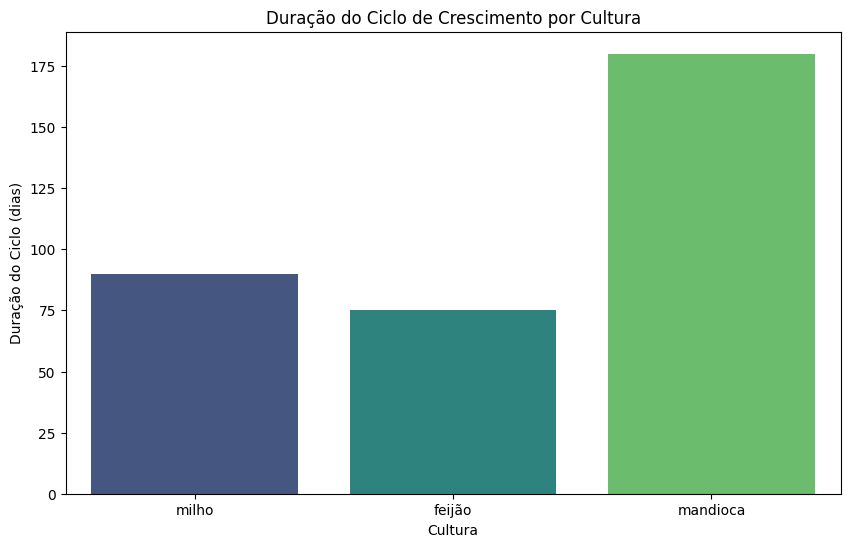

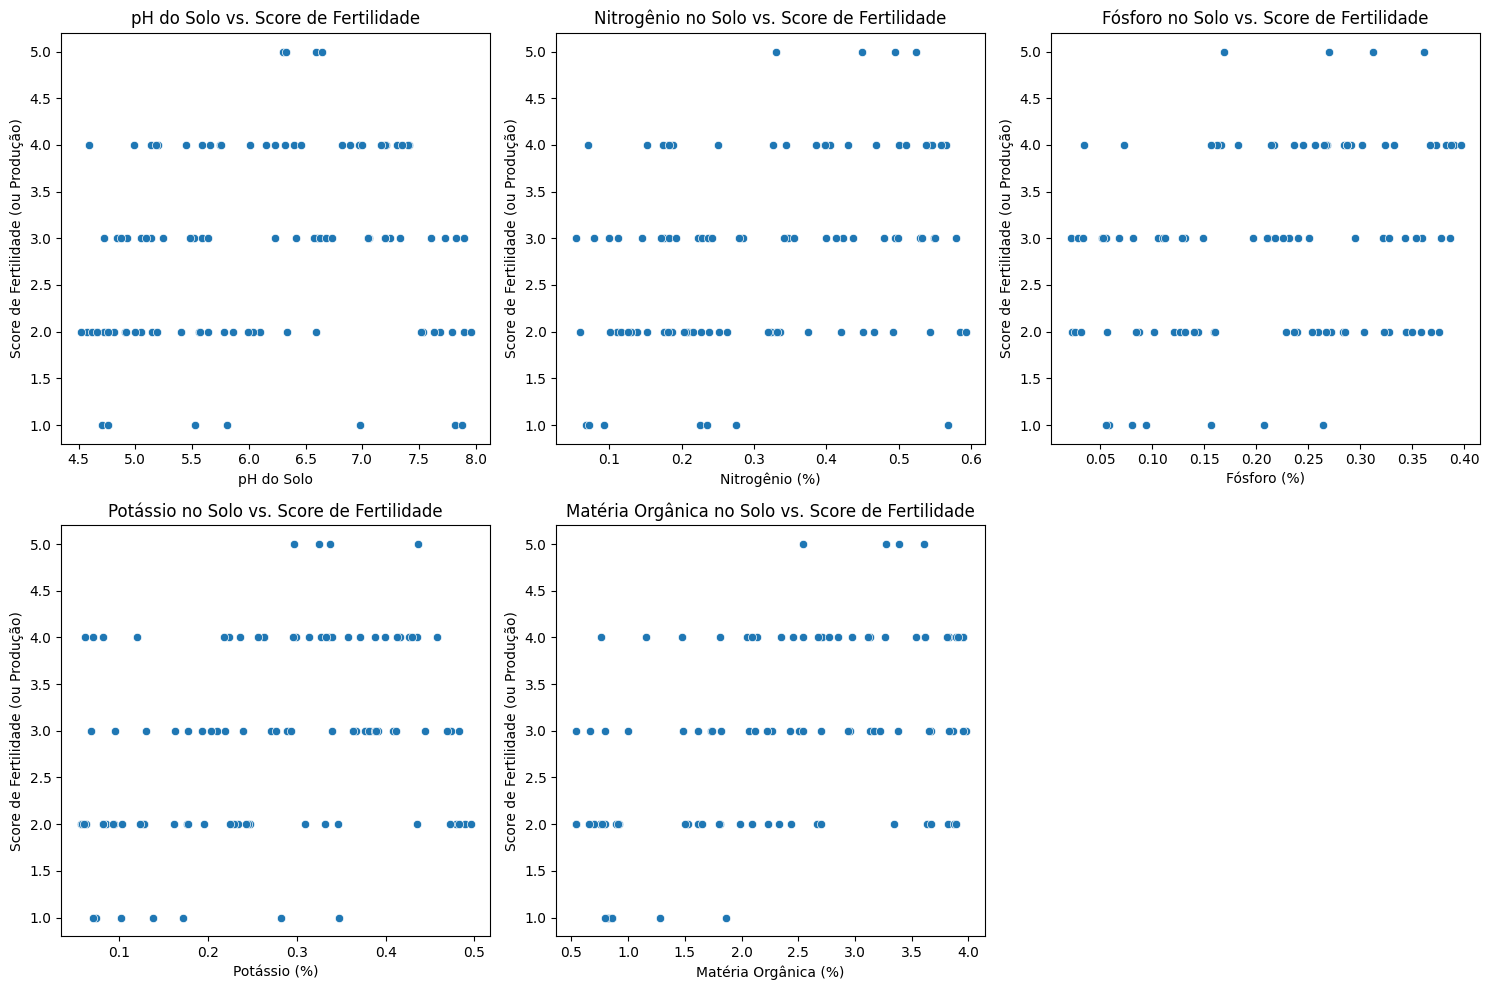

In [ ]:
# fertile_soil_scatter_plots.py
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# --- Simulate or Load your Soil and Yield Data ---
# In a real application, you would load this from your collected data

# For demonstration, let's create some simulated data
np.random.seed(42) # for reproducibility
num_samples = 100

# Simulate soil properties
simulated_soil_data = {
    'ph': np.random.uniform(4.5, 8.0, num_samples),
    'nitrogen': np.random.uniform(0.05, 0.6, num_samples),
    'phosphorus': np.random.uniform(0.02, 0.4, num_samples),
    'potassium': np.random.uniform(0.05, 0.5, num_samples),
    'organic_matter': np.random.uniform(0.5, 4.0, num_samples)
}

# Simulate a simple 'fertility score' based on ideal ranges
# In a real scenario, this would be your actual crop yield
def calculate_fertility_score(row):
    score = 0
    if 6.0 <= row['ph'] <= 7.5: score += 1
    if row['nitrogen'] > 0.3: score += 1
    if row['phosphorus'] > 0.15: score += 1
    if row['potassium'] > 0.2: score += 1
    if row['organic_matter'] > 2.0: score += 1
    return score

soil_df = pd.DataFrame(simulated_soil_data)
soil_df['fertility_score'] = soil_df.apply(calculate_fertility_score, axis=1)

# --- Create Scatter Plots ---

plt.figure(figsize=(15, 10))

# Scatter plot: pH vs. Fertility Score (or Yield)
plt.subplot(2, 3, 1)
sns.scatterplot(x='ph', y='fertility_score', data=soil_df)
plt.title('pH do Solo vs. Score de Fertilidade')
plt.xlabel('pH do Solo')
plt.ylabel('Score de Fertilidade (ou Produção)')

# Scatter plot: Nitrogen vs. Fertility Score (or Yield)
plt.subplot(2, 3, 2)
sns.scatterplot(x='nitrogen', y='fertility_score', data=soil_df)
plt.title('Nitrogênio no Solo vs. Score de Fertilidade')
plt.xlabel('Nitrogênio (%)')
plt.ylabel('Score de Fertilidade (ou Produção)')

# Scatter plot: Phosphorus vs. Fertility Score (or Yield)
plt.subplot(2, 3, 3)
sns.scatterplot(x='phosphorus', y='fertility_score', data=soil_df)
plt.title('Fósforo no Solo vs. Score de Fertilidade')
plt.xlabel('Fósforo (%)')
plt.ylabel('Score de Fertilidade (ou Produção)')

# Scatter plot: Potassium vs. Fertility Score (or Yield)
plt.subplot(2, 3, 4)
sns.scatterplot(x='potassium', y='fertility_score', data=soil_df)
plt.title('Potássio no Solo vs. Score de Fertilidade')
plt.xlabel('Potássio (%)')
plt.ylabel('Score de Fertilidade (ou Produção)')

# Scatter plot: Organic Matter vs. Fertility Score (or Yield)
plt.subplot(2, 3, 5)
sns.scatterplot(x='organic_matter', y='fertility_score', data=soil_df)
plt.title('Matéria Orgânica no Solo vs. Score de Fertilidade')
plt.xlabel('Matéria Orgânica (%)')
plt.ylabel('Score de Fertilidade (ou Produção)')


plt.tight_layout()
plt.show()

# You can analyze these plots to see how different soil properties
# correlate with fertility or yield. Areas with higher scores/yields
# in relation to specific soil parameters might indicate ideal ranges
# for those parameters in fertile soil.